<a href="https://colab.research.google.com/github/Khaing-Hsu-Wai/MMDT_2025_MLAI101/blob/khainghsuwai/Regression/Lab1_grad_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

#read the data
df=pd.read_csv('/Users/putuu/Documents/Github_Repo/MMDT_2025_MLAI101/Khaing-Hsu-Wai/Regression/data/Advertising.csv', index_col = 0)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [3]:
#get the feature column name
sel_program = 'radio'
X=df[[sel_program]]

#get the target variables and standardize it
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

print(X.head())

#standardize X
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
print(X.head())

   radio
1   37.8
2   39.3
3   45.9
4   41.3
5   10.8
      radio
1  0.979066
2  1.080097
3  1.524637
4  1.214806
5 -0.839507


In [4]:
#randomly initialize bias (b) and weight(s) (a) for the model
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [5]:
#predict Y values using current bias (b), weights (a), and input features (X)
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [6]:
#calculate the mean squared error (cost) between predicted and true Y values
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y)

In [7]:
#update bias (b) and weight (theta) using gradient descent based on prediction error
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [9]:
#run gradient descent to optimize bias (b) and weight(s) (theta), and return the training history
def run_gradient_descent(X,Y,alpha,num_iterations):
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])

    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    prev_cost =0

    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)
        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1
        if (np.abs(this_cost  - prev_cost )<= tolerance):
            break
        prev_cost = this_cost
    return gd_iterations_df,b,theta


#run the gradient descent with learning rate 0.01 and up to 400 iterations
gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)

print(gd_iterations_df)

     iteration   value_b  value_weight      cost
0          0.0  0.138143      0.186735  0.841632
1          1.0  0.135380      0.194486  0.834653
2          2.0  0.132672      0.202082  0.827950
3          3.0  0.130019      0.209527  0.821511
4          4.0  0.127419      0.216825  0.815326
..         ...       ...           ...       ...
218      218.0  0.001689      0.571354  0.664655
219      219.0  0.001655      0.571450  0.664654
220      220.0  0.001622      0.571545  0.664653
221      221.0  0.001590      0.571639  0.664652
222      222.0  0.001558      0.571730  0.664651

[223 rows x 4 columns]


<Axes: xlabel='value_weight', ylabel='cost'>

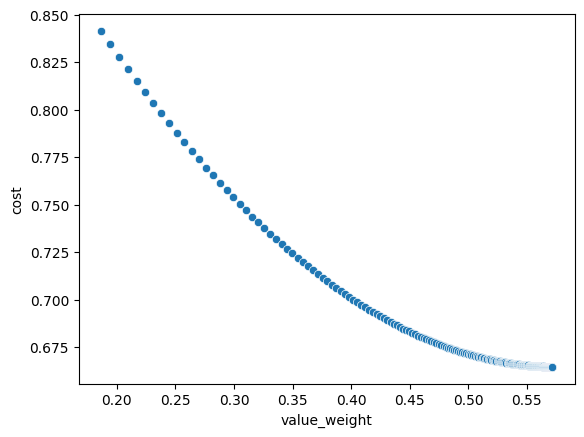

In [10]:
#can check how the weight value changes the cost during gradient descent
sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [11]:
#find the iteration with the lowest cost and get the best bias and weight values
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
best_parameters['value_weight']
print(best_parameters)
print(best_parameters['value_weight'])

value_b         0.001558
value_weight    0.571730
Name: 222, dtype: float64
0.5717297411351256


In [12]:
# use the initial and best parameters to make predictions based on the original input feature (x)
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
print(y_ini)

y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x
print(y_hat)

1      7.196715
2      7.476817
3      8.709267
4      7.850287
5      2.154878
         ...   
196    0.829061
197    1.053143
198    1.874776
199    7.981001
200    1.744061
Name: radio, Length: 200, dtype: float64
1      21.612942
2      22.470537
3      26.243953
4      23.613996
5       6.176239
         ...    
196     2.116958
197     2.803034
198     5.318644
199    24.014207
200     4.918434
Name: radio, Length: 200, dtype: float64


In [13]:
# calculate average absolute error, mean squared error, and count of large prediction errors (> 0.5)
import numpy as np

y_p = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*X
error = np.sum(np.abs(Y- y_p[sel_program]))/len(Y)
print(sel_program, error, get_cost(Y, y_p[sel_program]))

np.sum(((np.abs(Y- y_p[sel_program]))>0.5))
print("number of bad predictions:",np.sum(((np.abs(Y- y_p[sel_program]))>0.5)))

radio 0.6363124303110628 0.6646502182568398
number of bad predictions: 100


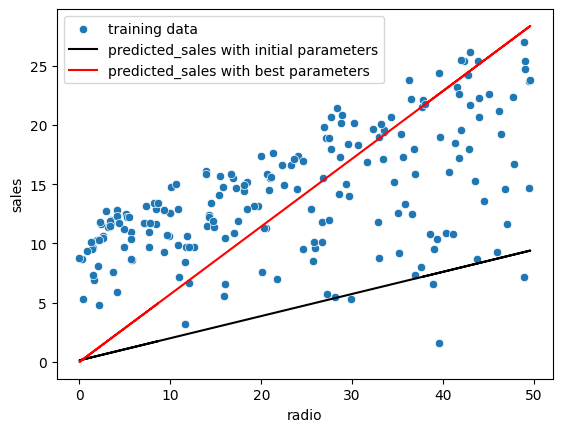

In [14]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()

In [15]:
#extra

for alpha in [0.001, 0.01, 0.1, 1.0]:
    print(f"\n=== Learning Rate: {alpha} ===")
    gd_iterations_df, b, theta = run_gradient_descent(X, Y, alpha=alpha, num_iterations=400)

    # Print last row (final result)
    print(gd_iterations_df.tail(1))  # last step's b, theta, and cost


=== Learning Rate: 0.001 ===
     iteration   value_b  value_weight      cost
399      399.0  0.382839      0.683912  0.823367

=== Learning Rate: 0.01 ===
     iteration   value_b  value_weight      cost
246      246.0  0.003454      0.572895  0.664652

=== Learning Rate: 0.1 ===
    iteration   value_b  value_weight      cost
26       26.0  0.000843      0.576459  0.664629

=== Learning Rate: 1.0 ===
     iteration   value_b  value_weight      cost
330      330.0 -0.930165      0.583159  1.529884
